# Importing The Files and libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
import numpy as np
df1 = pd.read_csv('Fire_Data.csv')
df2 = pd.read_csv('Non_Fire_Data.csv')
#big_data = pd.read_csv('Data_All.csv')
df = pd.concat([df1, df2])

In [3]:
big_data = pd.read_csv('Data_All.csv')
len(big_data)

30676278

# Check The Null Values and replace them with 0 

In [58]:
df.head()

,Aspect,DEM,ESA Worldcover,Fires,TCD,Forest Road Proximity,Fuels,MNDWI,NDVI,Power Lines Proximity,Railway Proximity,Road Proximity,Settlement Density,Settlement Proximity,Slope,Tree Ages,Tree Types,Water Proximity,X,Y
0,291.037506,190.0,40,1,64,293.110657,1,-0.354790,0.467964,12394.764648,60467.183594,1134.911743,1.039652,4817.520020,3.231857,1,4,0.014535,26.928611,40.609444
1,50.710594,183.0,40,1,76,3919.450928,5,-0.184606,0.142081,956.287903,45610.765625,117.044487,4.300601,1911.660400,3.297676,6,12,0.004479,26.805556,40.892222
2,329.036255,87.0,80,1,0,10915.355469,0,-0.077951,0.053810,3252.564941,37257.078125,360.776886,3.213603,1733.198608,1.354162,0,0,0.000278,26.723333,40.959444
3,67.619865,185.0,40,1,0,916.971863,1,-0.204714,0.142036,5022.707031,27966.208984,502.559662,5.632804,721.186401,4.262538,2,1,0.002953,26.921111,41.093056
4,1.468800,194.0,10,1,91,521.484497,3,-0.463901,0.535665,2206.639404,33309.261719,1317.628052,5.994038,3041.515625,8.987459,1,2,0.005945,26.891111,41.033333


In [3]:
df =df.rename(columns={"Power_Lines_Proximity":"Power Lines Proximity", 
                   "ESA_Worldcover":"LULC",
                   "Forest_Density":"TCD",
                   "Forest_Road_Proximity": "Forest Road Proximity",
                   "Railroad_Proximity": "Railway Proximity",
                   "Road_Proximity": "Road Proximity",
                   "Settlement_Density": "Settlement Density",
                   "Settlement_Proximity": "Settlement Proximity",
                   "Tree_Ages": "Tree Ages",
                   "Tree_Types": "Tree Types",
                   "Water_Proximity": "Water Proximity",
                   "Fuels" :"Forest Types"
                  })

In [5]:
big_data.isnull().any()
#df = df.drop('Forest_Road', 1)                 # Drop the unwanted column from df
#df['Forest_Road_Proximity'] = df['Forest_Road_Proximity'].fillna(0)   # Replace the Null Values in the specified column with zeros

Aspect                   False
DEM                      False
ESA_Worldcover           False
Forest_Density           False
Forest_Road_Proximity    False
Fuels                    False
MNDWI                    False
NDVI                     False
Power_Lines_Proximity    False
Railroad_Proximity       False
Road_Proximity           False
Settlement_Density       False
Settlement_Proximity     False
Slope                    False
Tree_Ages                False
Tree_Types               False
Water_Proximity          False
X                        False
Y                        False
dtype: bool

# Read Labels and Features

In [5]:
labels = np.asarray(df.Fires) # Read Label Columns as numpy array for Sklearn to understand
feature_cols = ["Aspect", 
                "DEM", 
                "LULC",
                "TCD",
                "Forest Types",
                "MNDWI",
                "NDVI",
                "Power Lines Proximity", 
                "Road Proximity",
                "Settlement Density",
                "Settlement Proximity",
                "Slope",
                "Tree Ages",
                "Tree Types",
                "Water Proximity",
                "Forest Road Proximity"
                                ]

In [78]:
df["Fires"].describe()

count    4477.000000
mean        0.335493
std         0.472215
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Fires, dtype: float64

In [5]:
def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

In [8]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
x = x[feature_cols]

In [8]:
corr_matr =x.corr(method='pearson', min_periods=1)

In [9]:
corr_matr

,Aspect,DEM,LULC,TCD,Forest Types,MNDWI,NDVI,Power Lines Proximity,Road Proximity,Settlement Density,Settlement Proximity,Slope,Tree Ages,Tree Types,Water Proximity,Forest Road Proximity
Aspect,1.000000,0.001019,-0.001372,-0.006030,-0.002045,0.026594,-0.021698,-0.015547,0.038471,-0.008801,0.003319,0.017274,-0.004398,0.001714,0.009785,-0.001701
DEM,0.001019,1.000000,-0.290977,0.303618,0.316293,-0.313571,0.269182,0.120974,0.074021,-0.227755,0.125286,0.301819,0.216570,0.160627,0.422896,-0.315058
LULC,-0.001372,-0.290977,1.000000,-0.741980,-0.553441,0.704572,-0.768757,0.024136,-0.053226,-0.024015,-0.131300,-0.454329,-0.545386,-0.564990,-0.117250,0.402747
TCD,-0.006030,0.303618,-0.741980,1.000000,0.630904,-0.689297,0.779451,0.001326,0.063436,-0.034783,0.202536,0.470987,0.615037,0.630433,0.119867,-0.407118
Forest Types,-0.002045,0.316293,-0.553441,0.630904,1.000000,-0.576444,0.606559,0.072354,0.032693,-0.112796,0.173518,0.355164,0.636629,0.669928,0.091394,-0.383517
MNDWI,0.026594,-0.313571,0.704572,-0.689297,-0.576444,1.000000,-0.937396,-0.055641,-0.035316,0.090156,-0.146475,-0.363743,-0.402638,-0.480960,-0.103632,0.428900
NDVI,-0.021698,0.269182,-0.768757,0.779451,0.606559,-0.937396,1.000000,-0.012184,0.014945,-0.000944,0.146470,0.446150,0.505249,0.565959,0.089990,-0.488707
Power Lines Proximity,-0.015547,0.120974,0.024136,0.001326,0.072354,-0.055641,-0.012184,1.000000,0.059032,-0.322045,0.193061,-0.000566,-0.065580,-0.061061,-0.011223,0.161776
Road Proximity,0.038471,0.074021,-0.053226,0.063436,0.032693,-0.035316,0.014945,0.059032,1.000000,-0.158352,0.174448,-0.007541,0.025595,0.051206,0.089267,0.059191
Settlement Density,-0.008801,-0.227755,-0.024015,-0.034783,-0.112796,0.090156,-0.000944,-0.322045,-0.158352,1.000000,-0.392423,0.106111,0.086983,-0.046360,-0.004598,-0.071573


In [10]:
corr_matr.to_csv('pearson2.csv')

In [11]:
corr_matr.to_excel("pearson_norailway.xlsx")

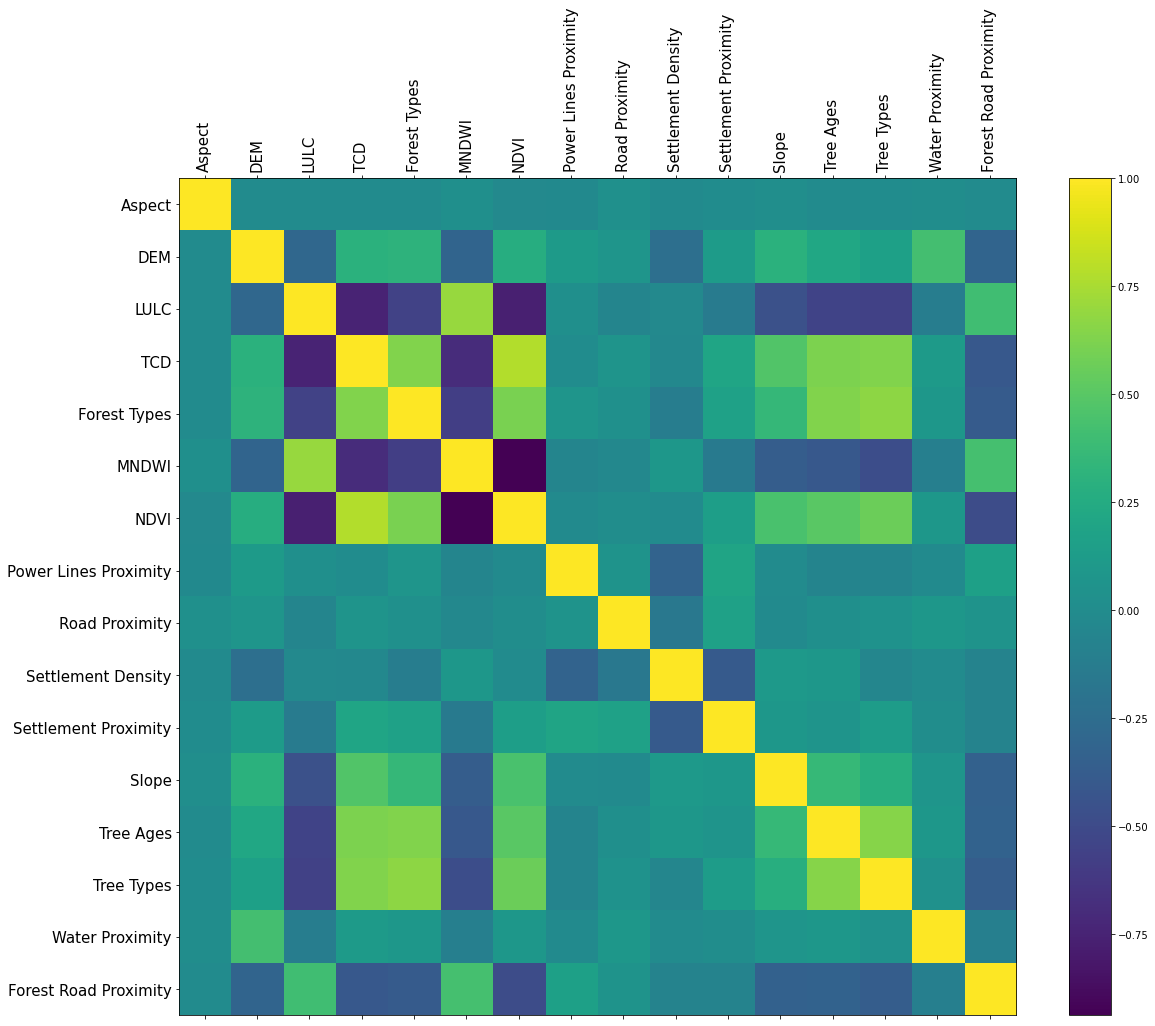

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matr, fignum=f.number)
plt.xticks(range(corr_matr.select_dtypes(['number']).shape[1]), corr_matr.select_dtypes(['number']).columns, fontsize=15, rotation=90)
plt.yticks(range(corr_matr.select_dtypes(['number']).shape[1]), corr_matr.select_dtypes(['number']).columns, fontsize=15)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
#plt.title('Pearson Matrix', fontsize=25);
plt.savefig('my_plot.png')